In [10]:
import pandas as pd
import numpy as np
import pysam as ps
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_codon_adaptation_index(fasta): 
    '''returns a dataframe that calculates codon adaptation index/gene in fasta file'''
    index=[]
    gene_ids=[]
    from Bio import SeqIO
    from Bio.SeqUtils import CodonUsage
    from Bio.SeqUtils.CodonUsage import CodonAdaptationIndex
    for record in SeqIO.parse(fasta, "fasta"):
        sequence=str(record.seq)
        
        try:
            Seq_Cai = CodonUsage.CodonAdaptationIndex()
            cai=Seq_Cai.cai_for_gene(sequence)
            index.append(cai)
            gene_ids.append(record.id)
        except:
            index.append('problem')
            gene_ids.append(record.id)
    df = pd.DataFrame({'gene_id':gene_ids, 'cai':index}, columns=['gene_id','cai'])
    return df

In [3]:
from Bio import SeqIO
infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
genes =[]
name = []
product = []
func = []
strand = []
start = []
stop = []
aaseq = []
cds_seq = []

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
for feature in infile.features:
    if feature.type == 'CDS' and 'product' in feature.qualifiers:  #Only cares for coding sequences which are not pseudogenes
        genes.append(feature.qualifiers['locus_tag'][0])
        try: name.append(feature.qualifiers['gene'][0])
        except: name.append('')
        product.append(str(feature.qualifiers['product'][0]))
        cds_seq.append(feature.location.extract(infile.seq).tostring())
        if 'function' in feature.qualifiers:                       #not all genes have known functions
            func.append(feature.qualifiers['function'][0])
        else:
            func.append("N/A")
        try:
            aaseq.append(feature.qualifiers['translation'][0])
        except:
            aaseq.append("N/A")
        if feature.strand == 1:
            strand.append("plus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
        elif feature.strand == -1:
            strand.append("minus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
gene_df = pd.DataFrame({"gene_id": genes,  "product": product},
                          columns = ["gene_id", "product"])



/home/m/anaconda2/lib/python2.7/site-packages/Bio/Seq.py:341: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


In [4]:
gene_df['product']=gene_df['product'].astype('object')

In [5]:
type(gene_df['product'])

pandas.core.series.Series

In [8]:
clju_condon_adaptation_index = get_codon_adaptation_index('/home/m/genome_files/REF-seq_CLJU.fna')
clju_condon_adaptation_index = pd.merge(clju_condon_adaptation_index, gene_df) #gene_df below!
clju_condon_adaptation_index = clju_condon_adaptation_index[clju_condon_adaptation_index.cai != 'problem']

In [9]:
pd.to

4111

In [7]:
clju_condon_adaptation_index=clju_condon_adaptation_index.sort_values(by='cai', ascending=False)
clju_condon_adaptation_index[clju_condon_adaptation_index['product'].str.contains('hypothetical protein')==False].head(20)

,gene_id,cai,product
3835,CLJU_RS19560,0.312663,carboxysome shell protein
1137,CLJU_RS05880,0.312663,carboxysome shell protein
2612,CLJU_RS13290,0.311079,4Fe-4S ferredoxin
3849,CLJU_RS19630,0.309761,microcompartment shellprotein
194,CLJU_RS01090,0.303182,50S ribosomal protein L31
2167,CLJU_RS11075,0.301563,iron-sulfur cluster-binding protein
683,CLJU_RS03625,0.300382,50S ribosomal protein L21
3580,CLJU_RS18275,0.299857,"pyridoxamine 5'-phosphate oxidase-like, FMN-bi..."
1138,CLJU_RS05885,0.293277,carboxysome shell protein
3834,CLJU_RS19555,0.293277,carboxysome shell protein


In [8]:
co_hi_te_cai=get_codon_adaptation_index('/home/m/Dropbox/Clostridium_paper/co_hi_te_gene.fasta')
co_lo_te_cai=get_codon_adaptation_index('/home/m/Dropbox/Clostridium_paper/co_lo_te_gene.fasta')

In [9]:
co_lo_te_cai=co_lo_te_cai[co_lo_te_cai.cai!='problem']

In [34]:
co_lo_te_cai.head()

,gene_id,cai
0,CLJU_RS00005,0.156674
1,CLJU_RS00020,0.134429
2,CLJU_RS00025,0.158206
3,CLJU_RS00080,0.143783
4,CLJU_RS00175,0.147639


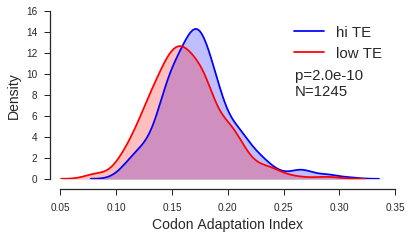

In [47]:
fig, ax= plt.subplots(figsize=[6,3])
sns.set_style('ticks')
sns.despine( offset=10)
sns.kdeplot(co_hi_te_cai.cai, color='blue', ax=ax, legend=False, shade=True )
sns.kdeplot(co_lo_te_cai.cai, color='red', ax=ax, legend=False, shade=True)

my_label=['high TE', 'low TE']
plt.legend(my_label, loc='best')
ax.set_xlabel('Codon Adaptation Index', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.legend(['hi TE', 'low TE'], fontsize=15)
plt.text(0.26, 8, 'p=2.0e-10\nN=1245' , fontsize=15)
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/CAI_of_high_and_low_co_TE.pdf',
           bbox_inches='tight')

In [6]:
stats.mannwhitneyu(co_hi_te_cai.cai, co_lo_te_cai.cai), len(co_hi_te_cai)+len(co_lo_te_cai)

(MannwhitneyuResult(statistic=153675.0, pvalue=1.3304610690400226e-10), 1245)

In [7]:
co_hi_te_cai['kind']='high'
co_lo_te_cai['kind']='low'
both=pd.concat([co_hi_te_cai, co_lo_te_cai], axis=0)

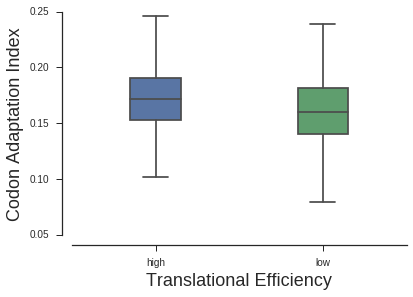

In [74]:
fig, ax = plt.subplots()
sns.set_style('ticks')
sns.despine(offset=10)
sns.boxplot(x='kind', y='cai', data=both, showfliers=False, ax=ax, width=0.3)
ax.set_xlabel('Translational Efficiency',fontsize=18)
ax.set_ylabel('Codon Adaptation Index',fontsize=18)
plt.show()

In [11]:
clju_cai = get_codon_adaptation_index('/home/m/genome_files/REF-seq_CLJU.fna') 

In [12]:
clju_cai=clju_cai[clju_cai.cai!='problem']

In [13]:
clju_cai=clju_cai.sort_values(by='cai', ascending=False)


In [14]:
gene_df.columns

Index([u'gene_id', u'product'], dtype='object')

In [15]:
clju_cai=pd.merge(clju_cai, gene_df)

In [16]:
clju_cai.to_excel('/home/m/Dropbox/Clostridium_paper/clju_cai.xls')

In [38]:
clju_cai=clju_cai.sort_values(by='cai', ascending=False)

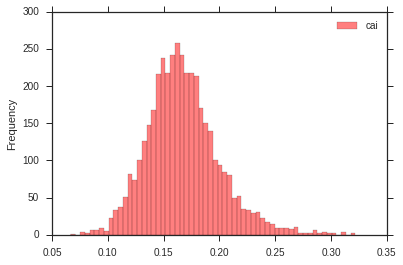

In [39]:
fig, ax=plt.subplots()
clju_cai.plot(kind='hist', ax=ax, alpha=0.5, color='red', bins=60)


# Testing whether the high CAI genes are linearly corrlated with high TE genes

In [17]:
co_hi_te_genes= pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_CO_80th_percent.txt', sep='\t')
co_lo_te_genes= pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_CO_20th_percent.txt',sep='\t')

In [18]:
#merging with clju cai
co_hi_te_genes=pd.merge(co_hi_te_genes, clju_cai)
co_lo_te_genes=pd.merge(co_lo_te_genes, clju_cai)

In [19]:
co_lo_te_genes=co_lo_te_genes[co_lo_te_genes.low_co_te>0.001]

In [20]:
co_lo_te_genes.cai[0]

0.15667384719503724

In [21]:
co_hi_te_genes.head()

,Unnamed: 0,gene_id,hiav_ribo_rpkm_co,hiav_rna_rpkm_co,hi_co_te,cai,product
0,12,CLJU_RS00085,101.272309,90.060027,1.124498,0.152722,seryl-tRNA synthetase
1,23,CLJU_RS00170,54.803626,49.298075,1.111679,0.263932,hypothetical protein
2,30,CLJU_RS00240,122.340275,96.585991,1.266646,0.140224,hypothetical protein
3,47,CLJU_RS00415,882.760957,597.513584,1.477391,0.213465,hypothetical protein
4,79,CLJU_RS00680,18.463463,17.779418,1.038474,0.151564,thymidylate kinase


In [23]:
np.cov(co_hi_te_genes.hi_co_te, co_hi_te_genes.cai)[0][1]

0.0034931126378342807

In [26]:
np.cov(co_lo_te_genes.low_co_te, co_lo_te_genes.cai)[0][1]

-4.95019390951787e-05

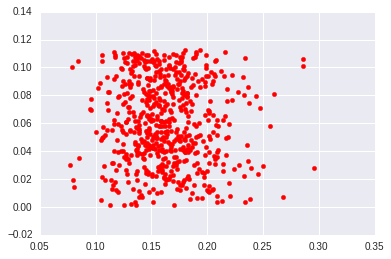

In [35]:
#plt.scatter(co_hi_te_genes.cai, co_hi_te_genes.hi_co_te)
plt.scatter(co_lo_te_genes.cai, co_lo_te_genes.low_co_te, color='red')


In [54]:
sp.stats.spearmanr(co_lo_te_genes.cai, co_lo_te_genes.low_co_te) #no correlation between cai and te

SpearmanrResult(correlation=-0.064769466478581714, pvalue=0.10742424876735572)

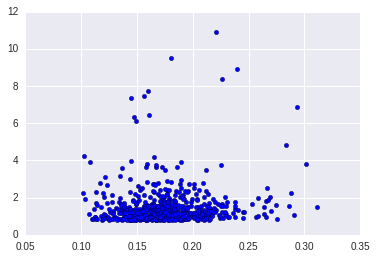

In [33]:
plt.scatter(co_hi_te_genes.cai, co_hi_te_genes.hi_co_te)

In [26]:
sp.stats.pearsonr(co_hi_te_genes.cai, co_hi_te_genes.hi_co_te)# also no correlation between cai and te

(0.098027588469156893, 0.0141410826568185)

# try to see if high CAI will correlate better to TE genes

In [57]:
df2=pd.read_excel('/home/m/Dropbox/Clostridium_paper/CLJU_omics_df.xls')

## check whether TE is constant regardless of condition

In [58]:
df2=df2.fillna(0.0)
df2=df2.replace('inf',0)

In [59]:
sp.stats.spearmanr(df2.h2c_te, df2.co_te),sp.stats.spearmanr(df2.h2c_te, df2.hf_te),sp.stats.spearmanr(df2.hf_te, df2.co_te)# spearman is high

(SpearmanrResult(correlation=0.82993255926412168, pvalue=0.0),
 SpearmanrResult(correlation=0.67793047887389268, pvalue=0.0),
 SpearmanrResult(correlation=0.71650690769792147, pvalue=0.0))

In [60]:
df2=pd.merge(df2, clju_cai, on='gene_id' )

In [61]:
sp.stats.spearmanr(df2.h2c_te, df2.cai),sp.stats.spearmanr(df2.hf_te, df2.cai),sp.stats.spearmanr(df2.co_te, df2.cai)# spearman is high

(SpearmanrResult(correlation=0.099710606257202183, pvalue=1.4823490293117444e-10),
 SpearmanrResult(correlation=0.14437655272402955, pvalue=1.3658122795082882e-20),
 SpearmanrResult(correlation=0.14488830106325704, pvalue=9.9766456767183168e-21))

In [32]:
# low correlation between CAI and TE

## check whether TE is correlated with 5'UTR delta G

In [62]:
dg = pd.read_csv('/home/m/Dropbox/Clostridium_paper/40_bp_upstream_of_ATG_deltaG_filtered.txt', sep='\t', names=['gene_id', 'dG'])

In [63]:
df2=pd.merge(df2, dg)

In [64]:
sp.stats.spearmanr(df2.dG, df2.cai),sp.stats.spearmanr(df2.hf_te, df2.dG)

(SpearmanrResult(correlation=-0.0120192825579959, pvalue=0.44104203065593195),
 SpearmanrResult(correlation=-0.001017555365481774, pvalue=0.94799656384635744))

In [65]:
mrna_dg=pd.read_csv('/home/m/Dropbox/Clostridium_paper/secondary_structure_genes/CLJU_REF_delta_G_normalized_by_length.txt', sep='\t', names=['gene_id', 'mrna_dg'])

In [66]:
df2=pd.merge(df2, mrna_dg)

In [67]:
sp.stats.spearmanr(df2.mrna_dg, df2.cai)

SpearmanrResult(correlation=-0.099482118619800899, pvalue=1.6327483827673869e-10)

# NO CORRELATION IS FOUND

## pause site correction is probably needed to get better correlations
Background:
1. There is no correlation between TE and CAI in our data. 
2. This is likely due to the fact that we cannot distinguish between translating ribosomes and pausing ones. 
3. Accordingly, we will correct for pause sites using average coverage + 1sd, 2sd,... 5sd. Then see which one gives best correlation with CAI. so CAI is gonna be used as the gold standard for TE

In [68]:
def center_weighting_from_sam(bamFile,min_read_length=20,max_read_length=42,reference='NC_000913'):
    """Function: Center weighting is achieved by taking off 1/2 the min_read_length at each end of each read and weighting the 
    remaining nucleotides in the center equally. This is summed up for all reads at one position. Minimum and
    maximum read length allowed can be set (default of 20/42)
	Input1(bamFile): Bamfile of ribosome profile reads mapped to the reference genome
	Input2(min_read_length): Integer of the minimum read length to include
	Input3(max_read_length): Integer of the maximum read length to include
	Input4(reference): NCBI identifier of organism to use
    Output1: Write .gff file of read densities at every nucleotide position on + and - strands in current directory
    Output2: Returns dataframe of read densities at every nucleotide position on + and - strands 
    """
    
    bamfile = ps.Samfile( bamFile )
    base_name = bamFile[:-4]
    
    ### NEED TO GENERALIZE THIS TO ACCOUNT FOR MULTIPLE CHROMOSOMES...SEE ALI'S SCRIPT
    #Checks for reference in bamfile
    if not reference in bamfile.references:
            print 'Reference ID is invalid. These are your options:\n'
            for ref in bamfile.references: print ref+'\n'
            return
    for i,ref in enumerate(bamfile.references):
        if ref == reference:
            ref_id = i
    
    center_weight_plus=np.zeros(int(bamfile.lengths[0]))  #to make sure that all positions in the genome are accounted for, even those without reads
    center_weight_minus=np.zeros(int(bamfile.lengths[0]))
    for read in bamfile:
        if read.is_unmapped == True:
            continue
        if not read.rname == ref_id:
            continue
        if min_read_length > read.qlen or max_read_length < read.qlen:
            continue
        center_left = read.pos + min_read_length/2
        center_right = int(read.aend) - min_read_length/2
        center_length = center_right - center_left + 1
	#center weighting is done above by removing the min read length from each end and giving each position a weight inversely proportional to the resulting read length
        if read.is_reverse==False:
            center_weight_plus[center_left:center_right+1]+= (1./center_length)
        else:
            center_weight_minus[center_left:center_right+1]+= (1./center_length)
        #center weights for each of the reads are summed up at every nucleotide position for the plus and minus strands separately
    gff = open('%s_center_weighted.gff'%base_name,'w')
    for item in center_weight_plus:
        if center_weight_plus[item]!=0:
            gff.write('%s\tcenter_weighted\t%s\t%i\t%i\t%f\t+\t.\t.\n'%(reference,base_name,item,item,center_weight_plus[item]))
    for item in center_weight_minus:
        if center_weight_minus[item]!=0:
            gff.write('%s\tcenter_weighted\t%s\t%i\t%i\t%f\t-\t.\t.\n'%(reference,base_name,item,item,center_weight_minus[item]))
    gff.close()
    
    df= pd.DataFrame({'plus':center_weight_plus,'minus':center_weight_minus}, columns = ["plus", "minus"], index = range(1, len(center_weight_plus) + 1))
    df.to_csv('%s_center_weighted_df.csv'%base_name)
    return df


def countReads(densitydf):
    return densitydf.plus.sum() + densitydf.minus.sum()
    


def pause_site_correction(genes, readdensities, totalreads, method='std_dev',set_to_zero=False, aa_ends_excluded=5): 
    pause_corrected_read_densities = readdensities.copy()
    pause_corrected_read_densities['plus'] = 0.000
    pause_corrected_read_densities['minus'] = 0.000    #make a copy of the read densities and set the initial values for correction columns to 0.
    for index, row in genes.iterrows():
        start = row['start'] + aa_ends_excluded*3-1 #exclude first and last 5 codons to remove effects of translation initiation and termination
        stop = row['stop'] - aa_ends_excluded*3
        strand = row['strand']
        length = stop - start + 1
        gene_series = readdensities[strand][start:stop]
        ave = gene_series.sum()/length #find the average occupancy across the gene
        try: std_dev = np.std(gene_series/float(length))/gene_series.sum() #find the standard deviation
        except: continue
        if method == 'std_dev':
            threshold = ave + 6*std_dev
            #print threshold
        for i in range(length):
            if readdensities[strand][start+i] < threshold: #pause sites are considered to be nucleotides where occupancy is > threshold 
                pause_corrected_read_densities.ix[start+i, strand]= readdensities[strand][start+i]
            elif set_to_zero: #occupancy on identified pause sites are reduced to threshold value
                pause_corrected_read_densities.ix[start+i, strand] = 0.
            else:
                pause_corrected_read_densities.ix[start+i, strand] = threshold
    return pause_corrected_read_densities

In [69]:
bamFile="/home/m/Desktop/h2co2_ribo-seq_rna-seq_tss_real/ribo_and_rna-seq/H2CO2-ribo1/sorted_H2CO2_ribo1.bam"
test1=center_weighting_from_sam(bamFile,min_read_length=20,max_read_length=42,reference='gi|300853232|ref|NC_014328.1|')

/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [214]:
def readDensity2Gene (data_frame):
    infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
    genes =[]
    name = []
    product = []
    func = []
    strand = []
    start = []
    stop = []
    aaseq = []
    cds_seq = []
    totalreads = []

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
    for feature in infile.features:
        if feature.type == 'CDS' and 'product' in feature.qualifiers:  #Only cares for coding sequences which are not pseudogenes
            genes.append(feature.qualifiers['locus_tag'][0])
            try: name.append(feature.qualifiers['gene'][0])
            except: name.append('')
            product.append(feature.qualifiers['product'][0])
            cds_seq.append(feature.location.extract(infile.seq).tostring())
            if 'function' in feature.qualifiers:                       #not all genes have known functions
                func.append(feature.qualifiers['function'][0])
            else:
                func.append("N/A")
            try:
                aaseq.append(feature.qualifiers['translation'][0])
            except:
                aaseq.append("N/A")
            if feature.strand == 1:
                strand.append("plus")
                start.append(feature.location.start.real+1)
                stop.append(feature.location.end.real)
            elif feature.strand == -1:
                strand.append("minus")
                start.append(feature.location.start.real+1)
                stop.append(feature.location.end.real)
    df = pd.DataFrame({"gene": genes, "name": name, "product": product, "function": func, "strand": strand, "start": start, "stop": stop, "cds_seq":cds_seq,"aaseq": aaseq},
                          columns = ["gene", "name", "function", "product", "strand", "start", "stop", "cds_seq","aaseq"])
    
    readdens=data_frame.copy()
    for index, row in df.iterrows():
        start = row['start']+14
        stop = row['stop']-15
        strand = row['strand']
        length = stop - start + 1
        totalreads= readdens[strand][start:stop].sum()
    
    
   
    expression = []
    ind_list=[]
    gene_list=[]
    for index, row in df.iterrows():
        start = row['start']+14 #exclude first and last 5 codons to remove effects of translation initiation and termination
        stop = row['stop'] -15
        strand = row['strand']
        length = row['stop'] - row['start'] + 1
        genesum = readdens[strand][start: stop].sum() * 1000000000/ length/ totalreads
        expression.append(genesum)
        ind_list.append(index)
        gene_list.append(row['gene'])
    translation = str(data_frame)
    gene_expression_df = pd.DataFrame({'gene_id': gene_list, 'translation':expression},index=ind_list, columns =['gene_id', 'translation'])
    return gene_expression_df

    

In [195]:
std5=pd.merge(std5,clju_cai)
sp.stats.spearmanr(std5.translation, std5.cai)

SpearmanrResult(correlation=0.075444896726293523, pvalue=1.2806196482255532e-06)

In [201]:
std4=pd.merge(std4,clju_cai)
sp.stats.spearmanr(std4.translation, std4.cai)

SpearmanrResult(correlation=0.075422380268204761, pvalue=1.2899975153627634e-06)

In [207]:
std3=pd.merge(std3,clju_cai)
sp.stats.spearmanr(std3.translation, std3.cai)

SpearmanrResult(correlation=0.075394755836627275, pvalue=1.3015930203533441e-06)

In [216]:
std2=readDensity2Gene(test1)
std2=pd.merge(std2,clju_cai)
sp.stats.spearmanr(std2.translation, std2.cai)

SpearmanrResult(correlation=0.07536369342040225, pvalue=1.3147513401578994e-06)

In [220]:
std6=readDensity2Gene(test1)
std6=pd.merge(std6,clju_cai)
sp.stats.spearmanr(std6.translation, std6.cai)

SpearmanrResult(correlation=0.075470886830183048, pvalue=1.2698765416403387e-06)

In [41]:
from Bio import SeqIO
infile = SeqIO.read('/home/m/genome_files/NZ_CP008776.gb','gb')
genes =[]
name = []
product = []
func = []
strand = []
start = []
stop = []
aaseq = []
cds_seq = []

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
for feature in infile.features:
    if feature.type == 'CDS' and 'product' in feature.qualifiers:  #Only cares for coding sequences which are not pseudogenes
        genes.append(feature.qualifiers['locus_tag'][0])
        try: name.append(feature.qualifiers['gene'][0])
        except: name.append('')
        product.append(feature.qualifiers['product'][0])
        cds_seq.append(feature.location.extract(infile.seq).tostring())
        if 'function' in feature.qualifiers:                       #not all genes have known functions
            func.append(feature.qualifiers['function'][0])
        else:
            func.append("N/A")
        try:
            aaseq.append(feature.qualifiers['translation'][0])
        except:
            aaseq.append("N/A")
        if feature.strand == 1:
            strand.append("plus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
        elif feature.strand == -1:
            strand.append("minus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
gene_df = pd.DataFrame({"gene_id": genes, "name": name, "product": product, "function": func, "strand": strand, "start": start, "stop": stop, "cds_seq":cds_seq,"aaseq": aaseq},
                          columns = ["gene_id", "name", "function", "product", "strand", "start", "stop", "cds_seq","aaseq"])




In [42]:
gas_cai = get_codon_adaptation_index('/home/m/genome_files/NZ_CP008776.fna')

In [44]:
gene_df=gene_df[[u'gene_id', u'product',]]
gas_cai = pd.merge(gas_cai,gene_df)
gas_cai = gas_cai.sort_values(by='cai', ascending=False)

In [45]:
gas_cai=gas_cai[gas_cai.cai!='problem']

In [227]:
gene_df['chr']='NZ_CP008776'
gene_df=gene_df[['gene_id','chr','start','stop','strand']]
gene_df.columns=['GeneID','Chr', 'Start','End','Strand']

In [231]:
gene_df.to_csv('/home/m/genome_files/NZ_CP008776.saf', sep='\t', index=False)